In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
from datetime import datetime, timedelta
from config import api_keys

In [2]:
crashes_data = pd.read_csv('Crashes_in_DC.csv', low_memory=False)
crashes_data.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY
0,-77.031956,38.899902,85021026,27674721,18076444,2018-05-13T21:15:36.000Z,11001402,55.638,31.327459,8680.0,...,11042442,H ST NW,20.687175,South,NaN,2018-05-25T17:40:55.000Z,38.900026,-77.031965,397259.53,136894.08
1,-76.937721,38.889783,85021027,27112008,16182556,2016-11-01T02:26:03.000Z,15031912,5711.647,0.000000,4701.0,...,12015342,BENNING RD NE,15.492998,West,NaN,NaN,38.889795,-76.937719,405426.80,135840.07
2,-76.995093,38.905551,85021028,24490573,13034481,2013-03-17T05:00:00.000Z,12055522A,122.834,0.000000,13683.0,...,12084792,TAPSCOTT ST NE,67.748277,East,NaN,NaN,38.905776,-76.994930,NaN,NaN
3,-77.036518,38.940813,85021029,27112014,16185922,2016-11-01T02:31:25.000Z,11084892,1783.690,0.000000,11073.0,...,11001602,16TH ST NW,8.776265,West,NaN,NaN,38.940765,-77.036516,396810.02,141417.08
4,-76.913418,38.896023,85021030,24490575,13034206,2013-03-19T05:00:00.000Z,12031982,0.000,0.000013,3927.0,...,12006102,61ST ST NE,0.850636,North,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
crash_details = pd.read_csv('Crash_Details_Table.csv', low_memory=False)
crash_details.head()

,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,175822354,27823785,18171025,87612070,Driver,0,N,N,N,4181220,Large/heavy Truck,N,VA,N,N
1,175822355,27823705,18170923,87612100,Driver,28,N,N,Y,4181265,Passenger Car/automobile,Y,DC,N,N
2,175822356,27824068,18171174,87612105,Driver,23,N,N,N,4181389,Passenger Car/automobile,Y,VA,N,N
3,175822357,27823832,18171027,87612134,Driver,54,N,N,N,4181292,Passenger Car/automobile,Y,Di,N,N
4,175822358,27823756,18171002,87612139,Driver,60,N,N,N,4181237,Passenger Car/automobile,N,DC,N,N


In [4]:
# Merge dataframes then sort by city
merged_data = crashes_data.merge(crash_details, on="CRIMEID", how="left")
merged_data = merged_data.sort_values("AGE")
merged_data.head ()

,X,Y,OBJECTID_x,CRIMEID,CCN_x,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
113551,-76.973889,38.873378,85070421,26594992,08089255,2008-06-28T05:00:00.000Z,47041542,21.031,0.000000,-9.0,...,-7991.0,N,N,N,770613,Suv (sport Utility Vehicle),N,DC,N,Y
359806,-76.959117,38.862550,85183575,25134222,14047803,2014-04-07T05:00:00.000Z,13017352,1680.972,0.000000,5665.0,...,-964.0,N,N,N,935575,Passenger Car/automobile,N,DC,N,N
41860,-77.033427,38.961600,85039033,26647726,11166002,2011-11-11T05:00:00.000Z,11061362,132.425,0.000011,5585.0,...,-184.0,N,N,N,890846,Passenger Car/automobile,N,DC,N,N
122112,-77.029708,38.937611,85074032,26614658,12016303,2012-02-02T05:00:00.000Z,11074032,52.731,0.000004,5385.0,...,-182.0,N,N,N,810935,Passenger Car/automobile,N,MD,N,N
189662,-76.986163,38.908514,85105194,26619123,10032775,NaN,12061622,728.777,0.000000,12738.0,...,-96.0,N,N,N,819546,Passenger Car/automobile,N,MD,N,Y


In [5]:
merged_data['AGE'].value_counts()

 0.0       151221
 27.0        8511
 28.0        8459
 26.0        8454
 29.0        8345
 30.0        8343
 31.0        8286
 25.0        8117
 32.0        7762
 33.0        7690
 34.0        7661
 24.0        7359
 35.0        7307
 36.0        7141
 38.0        6872
 37.0        6859
 39.0        6605
 23.0        6397
 40.0        6358
 41.0        6298
 42.0        6237
 46.0        6140
 43.0        6133
 47.0        6125
 45.0        6064
 44.0        6008
 48.0        5946
 51.0        5745
 49.0        5730
 52.0        5718
            ...  
 139.0          1
-10.0           1
 133.0          1
 146.0          1
-7991.0         1
 125.0          1
-13.0           1
-51.0           1
-5.0            1
-47.0           1
 215.0          1
 156.0          1
 142.0          1
 220.0          1
-58.0           1
-80.0           1
 126.0          1
 138.0          1
 207.0          1
-25.0           1
-70.0           1
 237.0          1
 218.0          1
-37.0           1
 119.0    

In [6]:
len (crash_details[crash_details["AGE"] <0])

79

In [7]:
new_df=merged_data[merged_data["AGE"] >0]
new_df =new_df.sort_values("AGE")
new_df.sort_values('AGE')
new_df=crash_details.dropna(axis = 0, how ='any')
new_df

,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,175822354,27823785,18171025,87612070,Driver,0,N,N,N,4181220,Large/heavy Truck,N,VA,N,N
1,175822355,27823705,18170923,87612100,Driver,28,N,N,Y,4181265,Passenger Car/automobile,Y,DC,N,N
2,175822356,27824068,18171174,87612105,Driver,23,N,N,N,4181389,Passenger Car/automobile,Y,VA,N,N
3,175822357,27823832,18171027,87612134,Driver,54,N,N,N,4181292,Passenger Car/automobile,Y,Di,N,N
4,175822358,27823756,18171002,87612139,Driver,60,N,N,N,4181237,Passenger Car/automobile,N,DC,N,N
5,175822359,27823684,18170927,87612141,Driver,64,N,N,N,4181281,Passenger Car/automobile,N,MD,N,N
6,175822360,27823718,18170994,87612209,Driver,32,N,N,N,4181274,Passenger Car/automobile,N,DC,N,N
7,175822361,27823693,18170958,87612216,Driver,46,N,N,N,4181277,Passenger Car/automobile,N,VA,N,N
8,175822362,27823617,18168512,87612220,Driver,39,N,N,N,4181216,Other Small/light Truck,Y,VA,N,N
9,175822363,27824106,18171413,87612225,Driver,41,N,N,N,4181361,Passenger Car/automobile,N,MD,N,N


In [8]:
new_df.AGE.unique()

array([    0,    28,    23,    54,    60,    64,    32,    46,    39,
          41,    57,    38,    70,    24,    35,    45,    52,    53,
          33,    27,    63,    31,    49,    43,    62,    61,    40,
          65,    47,    36,    48,    26,    59,    21,    74,    25,
          56,    18,    50,    58,    42,    34,    19,    30,    20,
          79,    44,    66,    22,    67,    55,    37,    68,    29,
          87,    51,    76,    69,    71,    84,    78,    82,    72,
          11,    10,    13,    75,    80,    98,    81,    73,    90,
           4,    17,     2,     3,    85,    77,    94,    16,    86,
         118,    15,   100,    83,    89,     5,    88,    92,     9,
          14,    -2,     8,    12,    91,     6,     7,     1,    95,
         117,    96,    97,    93,   119,    -1,   105,   104,   -80,
          99,   156,    -3,   -38,   -19,   103, -7991,   -26,   112,
         109,   -35,   102,   115,   -49,   137,   116,   114,   -96,
         -67,   -10,

In [9]:
# Bins for ages
age_bins = [0, 9.90, 14.90, 19.90, 24.90, 29.90, 34.90, 39.90, 44.90, 49.90, 56.90, 61.90, 66.90, 71.90, 76.99, 81.90, 99999]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+"]

# Group and sort age values into bins noted above
crash_details["Age Group"] = pd.cut(crash_details["AGE"],age_bins, labels=group_names)
crash_details

# Data frame for added "Age Group" and groupby
age_grouped = crash_details.groupby("PERSONTYPE")



In [10]:
# Slice the crash_details by PERSONTYPE type
drivers_data = crash_details.loc[crash_details["PERSONTYPE"]=="Driver"]
drivers_data.head()



,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING,Age Group
0,175822354,27823785,18171025,87612070,Driver,0,N,N,N,4181220,Large/heavy Truck,N,VA,N,N,NaN
1,175822355,27823705,18170923,87612100,Driver,28,N,N,Y,4181265,Passenger Car/automobile,Y,DC,N,N,25-29
2,175822356,27824068,18171174,87612105,Driver,23,N,N,N,4181389,Passenger Car/automobile,Y,VA,N,N,20-24
3,175822357,27823832,18171027,87612134,Driver,54,N,N,N,4181292,Passenger Car/automobile,Y,Di,N,N,50-54
4,175822358,27823756,18171002,87612139,Driver,60,N,N,N,4181237,Passenger Car/automobile,N,DC,N,N,55-59


In [11]:
# Slice the crash_details by PERSONTYPE type
bicyclist_data = crash_details.loc[crash_details["PERSONTYPE"]=="Bicyclist"]
bicyclist_data.head()

,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING,Age Group
162,175822516,27824144,18171442,87613702,Bicyclist,0,N,N,N,None,None,N,None,N,N,NaN
163,175822517,27823964,18171217,87613727,Bicyclist,26,N,N,N,None,None,N,None,N,N,25-29
377,175822731,27805691,18159396,87550710,Bicyclist,0,N,N,N,None,None,N,None,N,N,NaN
705,175823059,27707869,18097241,87171175,Bicyclist,11,N,N,Y,None,None,N,None,N,N,10-14
706,175823060,27706745,18096403,87171364,Bicyclist,33,N,N,N,None,None,N,None,N,N,30-34


In [12]:
# Slice the crash_details by PERSONTYPE type
pedestrian_data = crash_details.loc[crash_details["PERSONTYPE"]=="Pedestrian"]
pedestrian_data.head()

,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING,Age Group
160,175822514,27824003,18171221,87612334,Pedestrian,67,N,N,Y,None,None,N,None,N,N,65-69
161,175822515,27824226,18171511,87613601,Pedestrian,34,N,N,Y,None,None,N,None,N,N,30-34
704,175823058,27707607,18097088,87170821,Pedestrian,27,N,N,Y,None,None,N,None,N,N,25-29
707,175823061,27707855,18097273,87171393,Pedestrian,36,N,N,Y,None,None,N,None,N,N,35-39
708,175823062,27707726,18097205,87171868,Pedestrian,10,N,N,Y,None,None,N,None,N,N,10-14


In [13]:
Ptype_drivers=drivers_data.groupby("Age Group")["PERSONTYPE"].count().reset_index()
Ptype_drivers

,Age Group,PERSONTYPE
0,<10,138
1,10-14,214
2,15-19,3585
3,20-24,24575
4,25-29,40817
5,30-34,38770
6,35-39,34176
7,40-44,30644
8,45-49,29626
9,50-54,37342


In [14]:
Ptype_bicyclist=bicyclist_data.groupby("Age Group")["PERSONTYPE"].count().reset_index()
Ptype_bicyclist

,Age Group,PERSONTYPE
0,<10,25
1,10-14,60
2,15-19,149
3,20-24,363
4,25-29,525
5,30-34,518
6,35-39,298
7,40-44,157
8,45-49,146
9,50-54,174


In [15]:
Ptype_pedestrian=pedestrian_data.groupby("Age Group")["PERSONTYPE"].count().reset_index()
Ptype_pedestrian

,Age Group,PERSONTYPE
0,<10,199
1,10-14,193
2,15-19,214
3,20-24,414
4,25-29,544
5,30-34,454
6,35-39,310
7,40-44,233
8,45-49,233
9,50-54,370


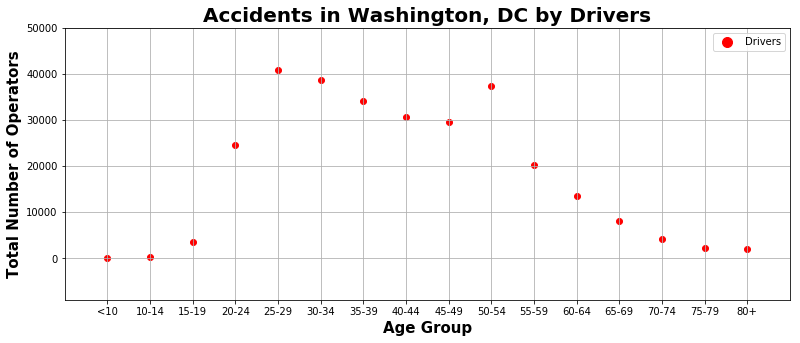

<Figure size 432x288 with 0 Axes>

In [16]:
#Build a scatter plot for Drivers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot

#fig = plt.figure(figsize=(15,9))
fig = plt.figure(figsize=(13,5))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.grid(True)           
sct_drivers=plt.scatter(x=Ptype_drivers["Age Group"], 
            y=Ptype_drivers["PERSONTYPE"], label="Drivers", color=['red'])
            
                   
# Set the legends then set equal sizes for legend pts
lgnd = plt.legend(handles=[sct_drivers],loc="best")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[0].set_color('red')


# Set texts and positions on the chart
#plt.text(3,5," ",fontsize=15)
# Set texts and positions on the chart
plt.text(9,30000, " ", fontsize=35)

# Incorporate the other graph properties
plt.title("Accidents in Washington, DC by Drivers", fontsize=20, fontweight='bold')
plt.xlabel ("Age Group", fontsize=15, fontweight='bold')
plt.ylabel ("Total Number of Operators", fontsize=15, fontweight='bold')
plt.grid(True)
plt.xlim(-1,16)
plt.ylim(-9000,50000)

# Show plot
plt.show()
          
# Save the figure
plt.savefig("drivers.png")

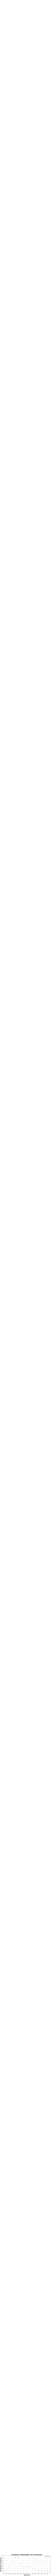

<Figure size 432x288 with 0 Axes>

In [24]:
#Build a scatter plot for Bicyclists (%)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot

#fig = plt.figure(figsize=(15,9))
fig = plt.figure(figsize=(13,5))
fig.savefig('myplot.eps', bbox_inches='tight')
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#plt.grid(True)           
sct_bicyclist=plt.scatter(x=Ptype_bicyclist["Age Group"], 
            y=Ptype_bicyclist["PERSONTYPE"], label="Bicyclist", color=['green'])
                        
# Set the legends then set equal sizes for legend pts
lgnd = plt.legend(handles=[sct_bicyclist],loc="best")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[0].set_color('green')

# Set texts and positions on the chart
#plt.text(3,5," ",fontsize=15)
# Set texts and positions on the chart
plt.text(12,100000, " ", fontsize=35)

# Incorporate the other graph properties
plt.title("Accidents in Washington, DC by Bicyclists", fontsize=20, fontweight='bold')
plt.xlabel ("Age Group", fontsize=15, fontweight='bold')
plt.ylabel ("Total Number of Operators", fontsize=15, fontweight='bold')
plt.grid(True)
plt.xlim(-0,16)
plt.ylim(-87,600)

# Show plot
plt.show()
          
# Save the figure
plt.savefig("bicyclist.png")

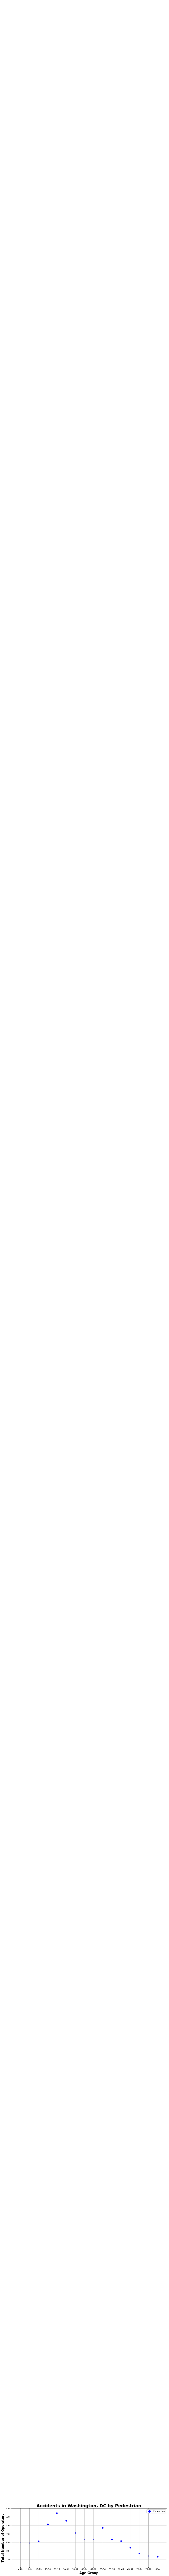

<Figure size 432x288 with 0 Axes>

In [18]:
#Build a scatter plot for Pedestrians
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot

#fig = plt.figure(figsize=(15,9))
fig = plt.figure(figsize=(13,5))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.grid(True)           
sct_pedestrian=plt.scatter(x=Ptype_pedestrian["Age Group"], 
            y=Ptype_pedestrian["PERSONTYPE"], label="Pedestrian", color=['blue'])
            
                   
# Set the legends then set equal sizes for legend pts
lgnd = plt.legend(handles=[sct_pedestrian],loc="best")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[0].set_color('blue')


# Set texts and positions on the chart
#plt.text(3,5," ",fontsize=15)
# Set texts and positions on the chart
plt.text(9,30000, " ", fontsize=35)

# Incorporate the other graph properties
plt.title("Accidents in Washington, DC by Pedestrian", fontsize=20, fontweight='bold')
plt.xlabel ("Age Group", fontsize=15, fontweight='bold')
plt.ylabel ("Total Number of Operators", fontsize=15, fontweight='bold') 
plt.grid(True)
plt.xlim(-1,16)
plt.ylim(-87,600)

# Show plot
plt.show()
          
# Save the figure
plt.savefig("pedestrian.png")